In [1]:
# import warnings filter
from warnings import simplefilter
# iéviter les warnings du au version des frameworks
simplefilter(action='ignore', category=FutureWarning)

# Création des données aléatoirement

In [2]:
import numpy as np

x = np.random.uniform(-10000,10000,(10000,)) 
y = np.random.uniform(-10000,10000,(10000,)) 

# ploting l'ellipse

générer des points  dans l'ellipse:

1-  générer des points de distribution  uniforme à l'intérieur d'un cercle unitaire,a l'aide les coordonnées polaires:
            - Choisisr un angle polaire (par exemple 0)
            - les coordonnées d'un cercle xc= r*cosϕ,yc = r*sinϕ

2- transformer le cercle en ellipse en rapprochant x par a et y par b par la relation xe = a*xc,ye = b*yc

3- tourner l'ellipse par θ seon Les coordonnées suivent: x= xe * cosθ - ye * sinθ,y = xe * sinθ + ye * cosθ

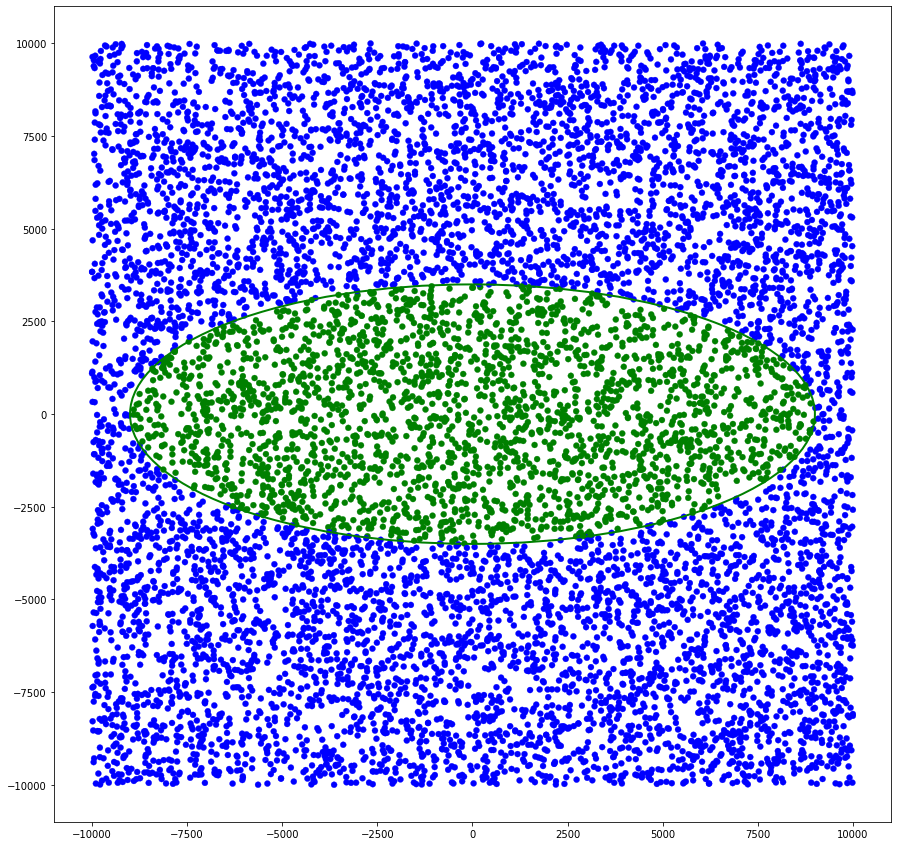

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig,ax = plt.subplots(1,1,figsize=(15,15))

# L'ellipse
ellipse_center = (0, 0)
G = 18000  
P = 7000        
angle = 0.

g_ellipse = patches.Ellipse(ellipse_center, G, P, angle=angle, fill=False, edgecolor='green', linewidth=2)
ax.add_patch(g_ellipse)

cos_angle = np.cos(np.radians(180.-angle))
sin_angle = np.sin(np.radians(180.-angle))

xc = x - ellipse_center[0]
yc = y - ellipse_center[1]

xct = xc * cos_angle - yc * sin_angle
yct = xc * sin_angle + yc * cos_angle 

# radius pour vérifier si les points sont a l'intérieur d'ellipse
# selon (x/A)² + (y/B)²<= 1 
rad_cc = (xct**2/(G/2.)**2) + (yct**2/(P/2.)**2)

colors_array = []

inside = []
outside = []
for i,r in enumerate(rad_cc):
    if r <= 1.:
        # point dans l'ellipse
        colors_array.append('green')
        inside.append(i)
    else:
        # point en dehors de l'ellipse 
        colors_array.append('blue')
        outside.append(i)

ax.scatter(x, y,c = colors_array,linewidths = 0.3)
plt.show()

# afficher la distribution des points séparés

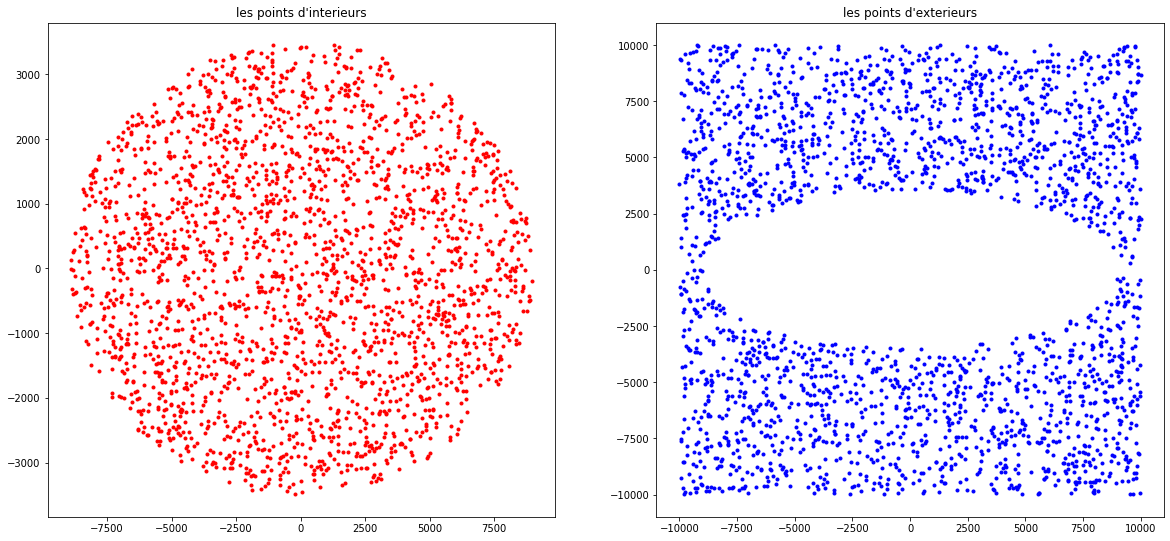

In [4]:
# afficher seulement les pts a l'interieurs et exterieurs séparés 
plt.figure( figsize = (20, 20))
plt.subplot(2, 2, 1)
plt.title("les points d'interieurs")
plt.plot(x[inside],y[inside], 'r.')

# prendre la meme taille que les points d'interieurs
# egaliaser la distribution 
_outside_ = outside[:len(inside)]
plt.subplot(2, 2, 2)
plt.title("les points d'exterieurs")
plt.plot(x[_outside_],y[_outside_],'b.')
plt.show()

# préparer la data pour l'apprentissage

In [5]:
# prendre les points interieurs 
train_inside = np.c_[x[inside], y[inside]]
list_of_ones = np.ones((len(inside),))

# prendre les points exterieurs 
train_outside = np.c_[x[_outside_], y[_outside_]]
list_of_zeros = np.zeros((len(_outside_),))

# séparer la data d'entrainement et celle des labels de prédiction
train = np.append(train_inside, train_outside, axis = 0)
# melanger les x et les y dans une meme structure
targets = np.append(list_of_ones, list_of_zeros, axis = 0)

### shuffle data

In [6]:
# melanger la data aleatoirement 
shuffle_index = np.random.permutation(len(train))
shuffled_train, shuffled_targets = train[shuffle_index], targets[shuffle_index]

### scaling data

In [7]:
#mean = shuffled_train.mean(axis = 0)
#shuffled_train -= mean

std = shuffled_train.std(axis = 0)
shuffled_train /= std

### séparer la data d'entrainement et de validation 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shuffled_train, shuffled_targets, test_size=0.2)

In [9]:
# verification de la data 
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_test.shape)

X_shapes:
 X_train: X_validation:
 (3910, 2) (978, 2) 

Y_shapes:
 Y_train: Y_validation:
 (3910,) (978,)


In [10]:
partial_x_train = X_train[500:]
partial_y_train = y_train[500:]

x_val = X_train[:500]
y_val = y_train[:500]

training_length = partial_x_train.shape[1]

# preparer  le model d'apprentissage 

In [18]:
# utilisation d'un simple model keras
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import RMSprop 
from keras.layers import Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(16, activation = 'relu', kernel_regularizer=l2(0.001), input_shape = (2,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### entrainement de modèle 

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 10,
                   validation_data = (x_val, y_val))

Train on 3410 samples, validate on 500 samples
Epoch 1/10
3410/3410 [==============================] - 3s 812us/step - loss: 0.6955 - acc: 0.5405 - val_loss: 0.6521 - val_acc: 0.5480
Epoch 2/10
3410/3410 [==============================] - 1s 242us/step - loss: 0.6417 - acc: 0.6202 - val_loss: 0.5964 - val_acc: 0.7380
Epoch 3/10
3410/3410 [==============================] - 1s 222us/step - loss: 0.5842 - acc: 0.7317 - val_loss: 0.5202 - val_acc: 0.8860
Epoch 4/10
3410/3410 [==============================] - 1s 270us/step - loss: 0.5272 - acc: 0.8018 - val_loss: 0.4332 - val_acc: 0.9300
Epoch 5/10
3410/3410 [==============================] - 1s 236us/step - loss: 0.4593 - acc: 0.8437 - val_loss: 0.3564 - val_acc: 0.9500
Epoch 6/10
3410/3410 [==============================] - 1s 245us/step - loss: 0.4026 - acc: 0.8642 - val_loss: 0.3019 - val_acc: 0.9520
Epoch 7/10
3410/3410 [==============================] - 1s 259us/step - loss: 0.3651 - acc: 0.8806 - val_loss: 0.2652 - val_acc: 0.9600
E

### visualiser l'apprentissage

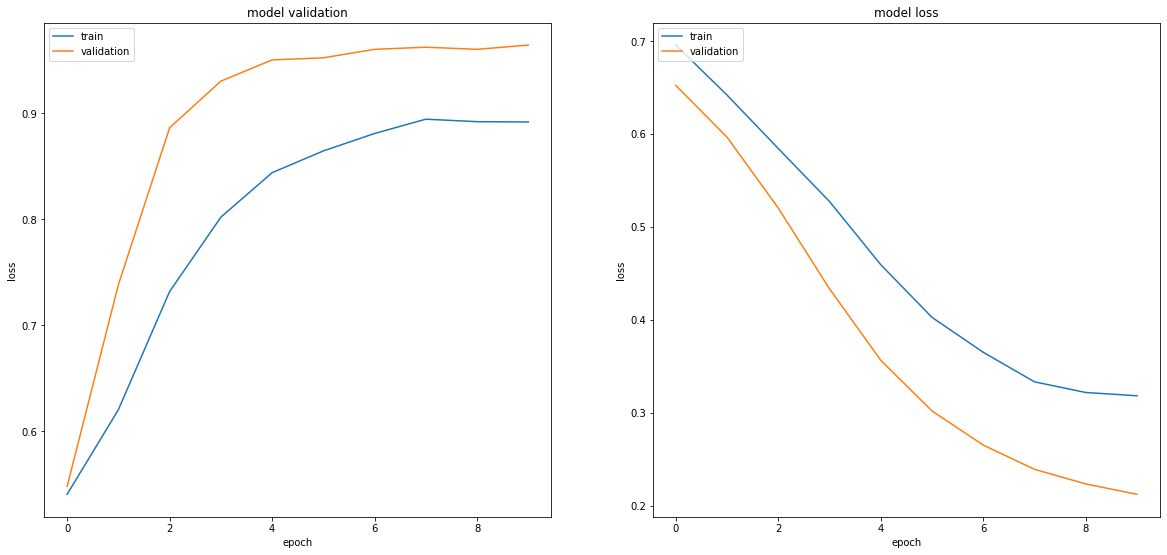

In [21]:
# "Loss"
plt.figure( figsize = (20, 20))
plt.subplot(2, 2, 1)
plt.title("les points d'interieurs")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.show()

### predire les points si ils sont dans ou dehors l'ellipse

In [22]:
evaluation = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

978/978 [==============================] - 0s 58us/step


### transformer les prédictions en coordonnée cartésiennes

In [23]:
inside_indice = []
outside_indice = []
for e in np.arange(len(X_test)):
    if predictions[e] >= evaluation[0]:
        inside_indice.append(e)
    else:
        outside_indice.append(e)
    
# séparer les points des deux classes par indices
inside_pts = X_test[inside_indice]
outside_pts = X_test[outside_indice]

all_pts = np.append(inside_pts, outside_pts, axis = 0)

In [24]:
#all_pts += mean
all_pts *= std

# séparer les x et les y 
yy = all_pts[:,-1]
xx = all_pts[:,0]

# Visualiser les résultats de modèle sur des données jamais vues

les points rouges sont les points prédits par le modèle comme points intérieurs de l'ellipse, les points noirs sont prédits comme points extérieurs.

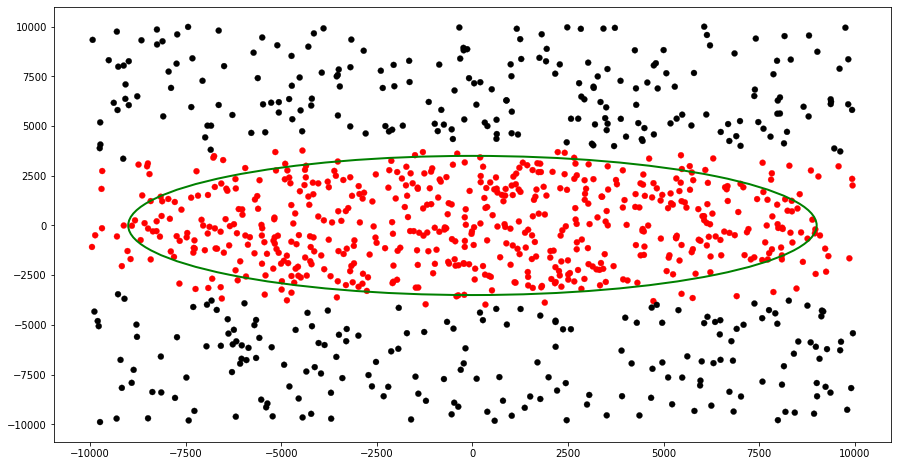

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
fig,ax = plt.subplots(1,1,figsize=(15,8))

 
colors_array = []

# utiliser le même ellipse d'entrainement
g_ellipse = patches.Ellipse(ellipse_center, G, P, angle=angle, fill=False, edgecolor='green', linewidth=2)
ax.add_patch(g_ellipse)

# parcourir les points 
for i in range(len(inside_pts) + len(outside_pts)):
    if i < len(inside_pts):
        colors_array.append('red')
    else:
        colors_array.append('black')

ax.scatter(xx, yy, c = colors_array,linewidths = 0.3)
plt.show()

############################################################################################################

# utilisation de machine learning 

les méthode de machines learning usuelle donne des résultats aussi bien que les réseaux de neurones pour cet exercice

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))

In [236]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time 


results = []
names = []

for name, model in models:
    debut = time.time()
    # entrainer chaque modèle sur 2 partie de la data et tester sur une seule
    kfold = KFold( n_splits = 3, random_state = 42)
    cv_results = cross_val_score( model, partial_x_train, partial_y_train, cv = kfold, scoring = 'roc_auc')
    results.append( cv_results )
    names.append( name )
    infos = '\n%s: %f (%f)' % (name, cv_results.mean(), cv_results.std() )
    print( infos )
    print( name + "      temps d'execution: "+time.strftime("%H:%M:%S", time.gmtime(time.time() - debut)))


LR: 0.486280 (0.010173)
LR      temps d'execution: 00:00:00

KNN: 0.998049 (0.000509)
KNN      temps d'execution: 00:00:00

DTC: 0.983644 (0.002820)
DTC      temps d'execution: 00:00:00

SVM: 0.999423 (0.000168)
SVM      temps d'execution: 00:00:00

RFC: 0.998515 (0.000878)
RFC      temps d'execution: 00:00:00


In [237]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_list = []

for name, model in models:
    y_pred = cross_val_predict(model, X_test, y_test, cv = 5)
    y_pred_list.append( y_pred )
    print("\nModel name: ", name)
    print("Rrecision score: ", precision_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("confusion matrix: \n",confusion_matrix( y_test, y_pred ))


Model name:  LR
Rrecision score:  0.5128205128205128
Recall score:  0.5189620758483033
F1 score:  0.5158730158730158
confusion matrix: 
 [[257 247]
 [241 260]]

Model name:  KNN
Rrecision score:  0.9446564885496184
Recall score:  0.9880239520958084
F1 score:  0.9658536585365854
confusion matrix: 
 [[475  29]
 [  6 495]]

Model name:  DTC
Rrecision score:  0.974
Recall score:  0.9720558882235529
F1 score:  0.9730269730269732
confusion matrix: 
 [[491  13]
 [ 14 487]]

Model name:  SVM
Rrecision score:  0.9192660550458716
Recall score:  1.0
F1 score:  0.9579349904397706
confusion matrix: 
 [[460  44]
 [  0 501]]

Model name:  RFC
Rrecision score:  0.9664031620553359
Recall score:  0.9760479041916168
F1 score:  0.971201588877855
confusion matrix: 
 [[487  17]
 [ 12 489]]


############################################################################################################